# Udacity Nano-degree project 2

## Introduction: The "We_rate_dogs" Twitter account

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.I will be wrangling this dataset.

### Step 1: Loading in the required packages

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import plotly.express as px

In [2]:
# downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
dogs_archive = pd.read_csv('C:/Users/HP/Downloads/twitter-archive-enhanced.csv')

In [3]:
#Let's take a glance at the top rows of the dataset
dogs_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
dogs_archive.shape

(2356, 17)

In [5]:
# I will now programmatically download the dog image prediction files, using the Requests library, with the provided url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [6]:
print(response.status_code)

200


In [7]:
# I will now create a new directory, where I will save the tsv file above, using the os.mkdir() function of the OS library
if os.path.exists("dogs/") is False:
    os.mkdir("dogs/")
else:
    print("Path is non-existent!")

Path is non-existent!


In [8]:
#fantastic! Now, I shall save/write the tsv file into the directory
with open(os.path.join("dogs/", url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)

# I will now check to see if the file has been saved in my directory
os.listdir("dogs/")

['image-predictions.tsv']

In [9]:
#The next sub-step is to read the file in my new directory into a dataframe, which I will call 'df_predictions'
df_predictions = pd.read_csv('dogs/image-predictions.tsv', sep = '\t')

In [10]:
df_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [12]:
#The next sub-step is loading the json.txt file 
tweet_lines=[]
with open('C:/Users/HP/Downloads/tweet-json.txt', 'r')as file:
    for line in file:
        data=json.loads(line)
        tweet_lines.append(data)

In [13]:
tweets_json = pd.DataFrame(tweet_lines, columns={'id', 'retweet_count', 'favorite_count'})

In [14]:
tweets_json.head(2)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


### Step 3: Programmatic and visual assessment

In [15]:
#Let's start off by looking at dogs_archive dataframe
dogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
#Checking for duplicate values
sum(dogs_archive.duplicated())

0

In [17]:
#Checking the names and frequency count of each value
dogs_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
dogs_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [19]:
#Let's have a closer look at the key indices of the dataset, by looking at the descriptive stats
dogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
dogs_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [21]:
dogs_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [22]:
dogs_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [23]:
dogs_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [24]:
#Next, we will take a closer look into the tweets_json dataframe
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
#Last but not the least, I will also be taking a closer look at 'df_predictions'
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# Taking a closer look at the table above, its obvious that we could perform a join between it and the dogs_archive dataframe
# we would have to screen and see which if all tweet ids present in df_predictions are also present in dogs_archive

len(df_predictions[~df_predictions.tweet_id.isin(dogs_archive.tweet_id)])

0

In [27]:
len(dogs_archive[~dogs_archive.tweet_id.isin(df_predictions.tweet_id)])

281

Quality related issues in the dogs_archive dataframe

1. Some of the columns have too many null values, some of the columns contain information that is of no value during assessment, such as the 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'source', 'text' and 'timestamp'. These columns will be dropped.

2. Some values in the column 'rating_denominator' are greater than or less than 10, this may be due to some data entry related errors, as such any value less than or greater than ten will be replaced with ten, such that all denominator_rating values will be ten throughout.

3. Some values in the column 'rating_numerator' are massively deviated away from the mean, such as the value '1776', such values will be replaced by the mean.

4. The archive contains duplicates entries in the form of retweets, those rows should be deleted.


Quality related issues in the Image_predictions dataframe 

1. There is an inequality in terms of the number of tweet id's when compared to the dogs_archive dataframe. I will be deleting the rows of data which are found in the dogs_archive but not in the df_predictions dataframe, in order to have a seamless merge between the two tables.

2. The columns titled "jpg-url" and "img-num" will be deleted as they are inconsiquential in the grand scheme of things, as far as analysis is concerned.

Tidyness issue

1. The table should be merged with the dogs_archive table and the engagements table to make it easier to analyse the data


### Step 4: Cleaning the data

In [28]:
#I start off by making copies of the dataframes

dogs_clean = dogs_archive.copy()
df_predictions_clean = df_predictions.copy()
tweet_engagements = tweets_json.copy()

In [29]:
dogs_clean = dogs_clean[~(dogs_clean.retweeted_status_id.notnull())]

In [30]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [31]:
dogs_clean = dogs_clean[~(dogs_clean.in_reply_to_status_id.notnull())]

In [32]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [39]:
dogs_clean.drop(columns=['retweeted_status_id'], inplace=True)

In [40]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   source              2097 non-null   object
 2   rating_numerator    2097 non-null   int64 
 3   rating_denominator  2097 non-null   int64 
 4   name                2097 non-null   object
dtypes: int64(3), object(2)
memory usage: 98.3+ KB


In [41]:
#We will now check for locations where the rating_denominator is less than 10
mask = dogs_clean.query('rating_denominator < 10')
mask

,tweet_id,source,rating_numerator,rating_denominator,name
516,810984652412424192,"<a href=""http://twitter.com/download/iphone"" r...",24,7,Sam
2335,666287406224695296,"<a href=""http://twitter.com/download/iphone"" r...",1,2,an


In [42]:
#lets replace these values in the tibble above generated from our query with the standard value of '10'
mask = dogs_clean['rating_denominator'] < 10
dogs_clean.loc[mask, 'rating_denominator'] = 10

In [43]:
#lets query the dataframe to assess if the change has been made
mask = dogs_clean.query('rating_denominator < 10')
mask

,tweet_id,source,rating_numerator,rating_denominator,name


In [44]:
mask = dogs_clean.query('rating_denominator > 10')
mask

,tweet_id,source,rating_numerator,rating_denominator,name
433,820690176645140481,"<a href=""http://twitter.com/download/iphone"" r...",84,70,None
902,758467244762497024,"<a href=""http://twitter.com/download/iphone"" r...",165,150,None
1068,740373189193256964,"<a href=""http://twitter.com/download/iphone"" r...",9,11,None
1120,731156023742988288,"<a href=""http://twitter.com/download/iphone"" r...",204,170,this
1165,722974582966214656,"<a href=""http://twitter.com/download/iphone"" r...",4,20,None
1202,716439118184652801,"<a href=""http://twitter.com/download/iphone"" r...",50,50,Bluebert
1228,713900603437621249,"<a href=""http://twitter.com/download/iphone"" r...",99,90,None
1254,710658690886586372,"<a href=""http://twitter.com/download/iphone"" r...",80,80,None
1274,709198395643068416,"<a href=""http://twitter.com/download/iphone"" r...",45,50,None
1351,704054845121142784,"<a href=""http://twitter.com/download/iphone"" r...",60,50,a


In [45]:
#we will perform the same operation as earlier by replacing all of these values with 10
mask = dogs_clean['rating_denominator'] > 10
dogs_clean.loc[mask, 'rating_denominator'] = 10

In [46]:
#In this next step, we will consider the rating_numerator column, which has alot of outliers, leading to inconsistencies in
# the scoring system. I will replace all numerators greater than the mean, by the mean rounded off 
#to 2 significant figures. i.e 13
mask = dogs_clean['rating_numerator'] > 13.126486
dogs_clean.loc[mask, 'rating_numerator'] = 13

In [47]:
# In the next step, I will be converting the numerator and denominator into strings, before combining them into fraction form and 
# loading them into a new column, which I will merge into the dogs_clean dataframe using pandas 'pd.concat'
dogs_clean['rating_denominator'] = dogs_clean['rating_denominator'].astype(str)
dogs_clean['rating_numerator'] = dogs_clean['rating_numerator'].astype(str)



In [50]:
dogs_clean.head(2)

,tweet_id,source,rating_numerator,rating_denominator,name
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly


In [51]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   source              2097 non-null   object
 2   rating_numerator    2097 non-null   object
 3   rating_denominator  2097 non-null   object
 4   name                2097 non-null   object
dtypes: int64(1), object(4)
memory usage: 162.8+ KB


In [53]:
# combining numerator and denominator and creat a new column called "cuteness_rating"
dogs_clean["cuteness_rating"] = dogs_clean["rating_numerator"] + "/" + dogs_clean["rating_denominator"]


In [54]:
dogs_clean.head(3)

,tweet_id,source,rating_numerator,rating_denominator,name,cuteness_rating
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,13/10
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,13/10
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,12/10


In [56]:
# I will now drop the rating_numerator and rating_denominator columns
dogs_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

In [57]:
#cheking to see if the change has been effected....
dogs_clean.head(2)

,tweet_id,source,name,cuteness_rating
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,13/10
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,13/10


In [58]:
#In this next step, I will be cleaning the 'source' column. Right now, the relevant information is enclosed in between the 
#HTML anchor <a> tags, I will be removing all the links and leaving the information regarding which platform the person is 
# making a post from

dogs_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [59]:
#I will now use a regex code to extract the relevant information between the tags
dogs_clean.source = dogs_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\HP\AppData\Local\Temp\ipykernel_11060\4169042191.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dogs_clean.source = dogs_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


In [60]:
dogs_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [61]:
#Fantastic! the code works, I will now convert the 4 different variables to categorical variables, so that we can 
#make comparisons between them easily
dogs_clean["source"] = dogs_clean["source"].astype("category")

In [62]:
#The next step will be cleaning and merging the image predictions table with our dogs_clean table
df_predictions_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1075,717047459982213120,https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg,1,golden_retriever,0.983548,True,Labrador_retriever,0.012185,True,cocker_spaniel,0.002412,True
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False


In [63]:
df_predictions_clean.drop(columns=['jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [64]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   p1        2075 non-null   object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


In [65]:
dogs_clean = dogs_clean.merge(df_predictions_clean, how='left', left_on='tweet_id', right_on='tweet_id')

In [66]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         2097 non-null   int64   
 1   source           2097 non-null   category
 2   name             2097 non-null   object  
 3   cuteness_rating  2097 non-null   object  
 4   p1               1971 non-null   object  
dtypes: category(1), int64(1), object(3)
memory usage: 84.2+ KB


In [67]:
dogs_clean = dogs_clean.dropna()

In [69]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         1971 non-null   int64   
 1   source           1971 non-null   category
 2   name             1971 non-null   object  
 3   cuteness_rating  1971 non-null   object  
 4   p1               1971 non-null   object  
dtypes: category(1), int64(1), object(3)
memory usage: 79.1+ KB


In [70]:
#I will now rename the id column of the tweer_engagements dataframe to tweet_id
tweet_engagements.rename({'id':'tweet_id'}, axis=1, inplace=True)

In [71]:
tweet_engagements['favorite_count'] = tweet_engagements.favorite_count.astype('Int64')
tweet_engagements['retweet_count'] = tweet_engagements.retweet_count.astype('Int64')

In [72]:
dogs_clean = dogs_clean.merge(tweet_engagements, how='left', left_on='tweet_id', right_on='tweet_id')


In [73]:
dogs_clean["name"] = dogs_clean["name"].astype("category")

In [74]:
dogs_clean["p1"] = dogs_clean["p1"].astype("category")

In [77]:
dogs_clean["cuteness_rating"] = dogs_clean["cuteness_rating"].astype("category")

In [75]:
dogs_clean = dogs_clean.dropna()

In [78]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         1971 non-null   int64   
 1   source           1971 non-null   category
 2   name             1971 non-null   category
 3   cuteness_rating  1971 non-null   category
 4   p1               1971 non-null   category
 5   favorite_count   1971 non-null   Int64   
 6   retweet_count    1971 non-null   Int64   
dtypes: Int64(2), category(4), int64(1)
memory usage: 128.5 KB


In [79]:
#saving....
dogs_clean.to_csv('twitter_archive_master.csv', index = False)

## Exploratory data analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TweetDeck'),
  Text(1, 0, 'Twitter Web Client'),
  Text(2, 0, 'Twitter for iPhone'),
  Text(3, 0, 'Vine - Make a Scene')])

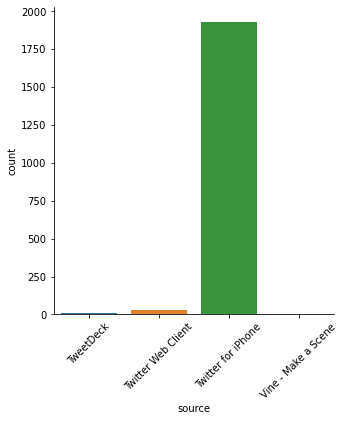

In [80]:
sns.catplot(x ="source",
kind ="count", data = dogs_clean)
plt.xticks(rotation=45)

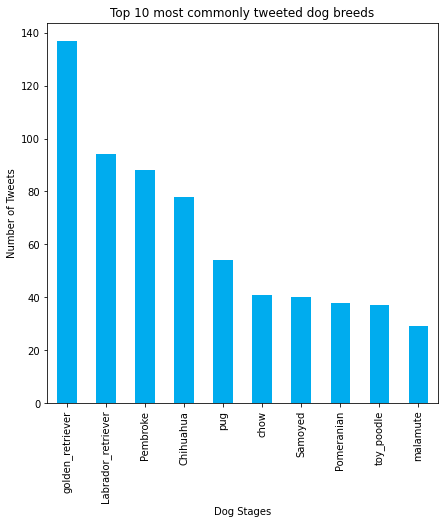

In [81]:
# top 10 dog breeds.
breed_values = dogs_clean.p1.value_counts(ascending=False)
breed_values[:10].plot(kind='bar',color='#00acee',figsize=(7,7))
plt.title('Top 10 most commonly tweeted dog breeds')
plt.ylabel('Number of Tweets')
plt.xlabel('Dog Stages');

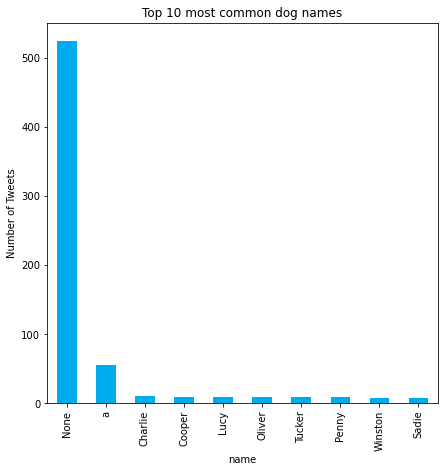

In [87]:
# Plot the top 10 dog names.
breed_values = dogs_clean.name.value_counts(ascending=False)
breed_values[:10].plot(kind='bar',color='#00acee',figsize=(7,7))
plt.title('Top 10 most common dog names')
plt.ylabel('Number of Tweets')
plt.xlabel('name');

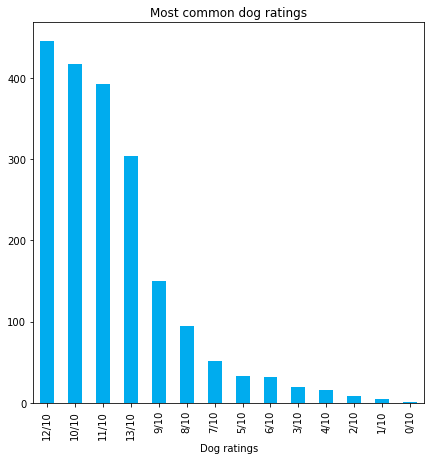

In [83]:
rating_values = dogs_clean.cuteness_rating.value_counts(ascending=False)
rating_values.plot(kind='bar',color='#00acee',figsize=(7,7))
plt.title('Most common dog ratings')
plt.xlabel('Dog ratings');